In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


import sklearn.cluster as sc

# import sklearn.datasets as sd
# import sklearn.feature_extraction.text as ft
# import sklearn.model_selection as ms
# import sklearn.linear_model as lm
# import sklearn.tree as st
# import sklearn.ensemble as se
# import sklearn.naive_bayes as nb
# import sklearn.svm as svm
import sklearn.metrics as sm


200 (200, 2)


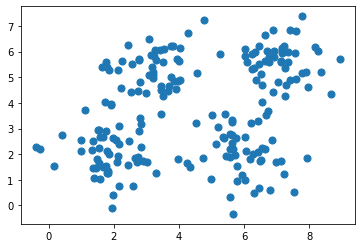

In [46]:
data = pd.read_csv("multiple3.txt",header=None)
print(len(data),data.shape)
plt.scatter(data[0],data[1],s=50)

# Kmeans聚类算法

平均轮廓系数： 0.5773232071896658


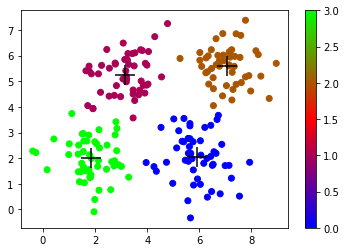

In [47]:
model_KM = sc.KMeans(n_clusters=4)
model_KM.fit(data)

labels = model_KM.labels_


#计算轮廓系
scores = sm.silhouette_score(data,labels,sample_size=len(data),metric="euclidean")
print("平均轮廓系数：",scores)



#获取4个聚类中心
centers = model_KM.cluster_centers_
centers = pd.DataFrame(centers)


plt.scatter(data[0],data[1],c=labels,cmap="brg")
plt.colorbar()

plt.scatter(centers[0],centers[1],c="black",marker="+",s=400)
plt.show()

# DBSCAN算法实现聚类

0.6500000000000001
最佳平均轮廓系数得分： 0.4886441816584064


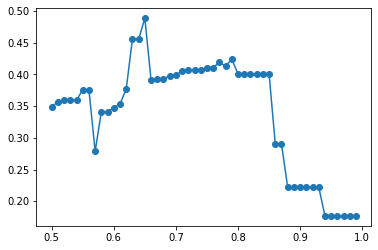

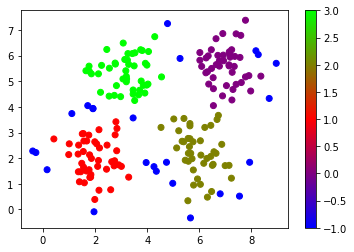

In [52]:
params = np.arange(0.5,1,0.01)

scores = []
for p in params:

    model_dbscan = sc.DBSCAN(eps=p,min_samples=5)
    model_dbscan.fit(data)
    labels = model_dbscan.labels_
    s = sm.silhouette_score(data,labels,sample_size=len(data),metric="euclidean")
    scores.append(s)

scores = pd.Series(scores)
plt.plot(params,scores,"o-")    

best_ind = np.argmax(scores)
best_eps = params[best_ind]
print(best_eps)


model_dbscan = sc.DBSCAN(eps=best_eps,min_samples=5)
model_dbscan.fit(data)
labels = model_dbscan.labels_
s = sm.silhouette_score(data,labels,sample_size=len(data),metric="euclidean")

plt.figure()
plt.scatter(data[0],data[1],c=labels,cmap="brg")
plt.colorbar()


print("最佳平均轮廓系数得分：",s)

In [57]:
data.iloc[model_dbscan.core_sample_indices_,:] #核心样本

,0,1
3,6.36,4.89
4,1.77,1.55
6,5.78,0.95
8,1.76,2.90
9,3.20,4.98
...,...,...
193,3.67,4.47
196,2.15,0.75
197,3.26,6.08
198,5.72,1.98


In [59]:
data[labels==-1] #孤立样本


,0,1
0,1.96,-0.09
2,4.74,1.84
19,8.68,4.33
24,1.92,3.93
26,5.66,-0.33
46,7.54,0.52
73,1.92,3.94
96,3.96,1.83
102,4.35,1.49
107,5.26,5.89
